In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv
/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv


# Reading the dataset

In [15]:
# Define the file paths
file_paths = [
    "/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv",
    "/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv",
    "/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv",
    "/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv",
    "/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv"
]

# Initialize an empty list to hold dataframes
dfs = []

# Read each file into a dataframe and add to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Optionally, you can add a column for the category if not already present
    category = file_path.split('/')[-1].split('_')[0]  # Extract category from file name
    df['category'] = category
    dfs.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Optionally, save the combined dataframe to a new CSV file
combined_df.to_csv('combined_news_data.csv', index=False)

# Display the first few rows of the combined dataframe
print(combined_df.head())

                                                                           headlines  \
0         Unlocking the science of E Ink displays: Why we believe they must catch on   
1              Reddit is free education: 9 subreddits that can be your best teachers   
2  Nintendo Switching things up? Leaks suggest larger 8″ screen for next-gen console   
3       Epic’s Fortnite and new browser engines show cracks in Apple’s walled garden   
4                 Hubble finds water vapour on small exoplanet in landmark discovery   

                                                                                                                                                                            description  \
0                                                                            That e-reader screen isn't magic - it's E Ink! We break down the science behind these paper-like displays.   
1                                            These subreddits bring the best of the Internet. Fro

In [18]:
import pandas as pd

# Reset the display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

# Now when you print the DataFrame, it will show in the default format
combined_df.head()


,headlines,description,content,url,category
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Exploratory Data Analysis (EDA)

In [5]:
# Display basic information about the dataset
print(combined_df.info())
print(combined_df.describe())
print(combined_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    10000 non-null  object
 1   description  10000 non-null  object
 2   content      10000 non-null  object
 3   url          10000 non-null  object
 4   category     10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB
None
                                                headlines  \
count                                               10000   
unique                                               9987   
top     KC Mahindra Education Trust invites applicatio...   
freq                                                    2   

                                              description  \
count                                               10000   
unique                                               9978   
top     The app is widely used in Iraq for messaging b...   
freq     

In [6]:
# Check for missing values
print(combined_df.isnull().sum())

headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [7]:
# Distribution of articles across categories
category_counts = combined_df['category'].value_counts()
print(category_counts)

category
technology       2000
sports           2000
education        2000
entertainment    2000
business         2000
Name: count, dtype: int64


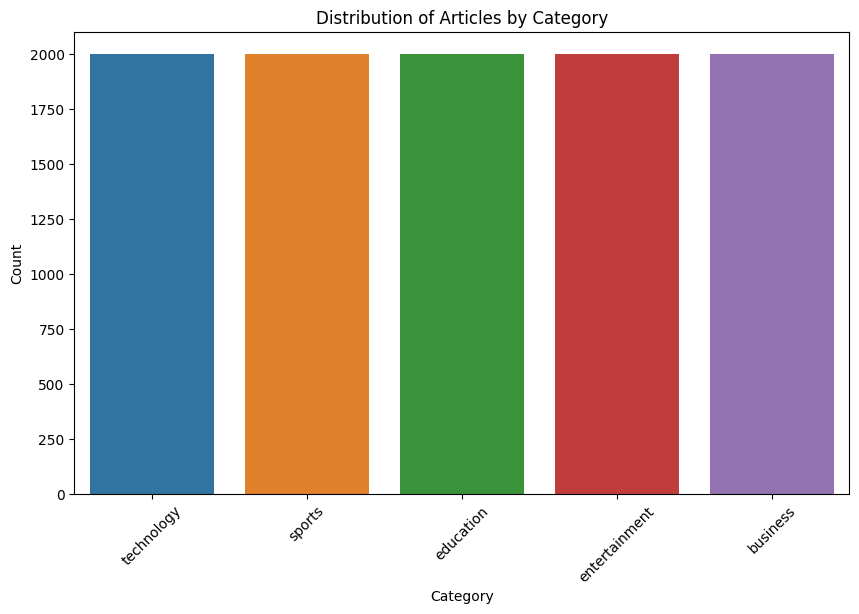

In [8]:
# Plot the distribution of articles across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='category', order=category_counts.index)
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Analyze the length of headlines, descriptions, and content
combined_df['headline_length'] = combined_df['headlines'].apply(len)
combined_df['description_length'] = combined_df['description'].apply(len)
combined_df['content_length'] = combined_df['content'].apply(len)

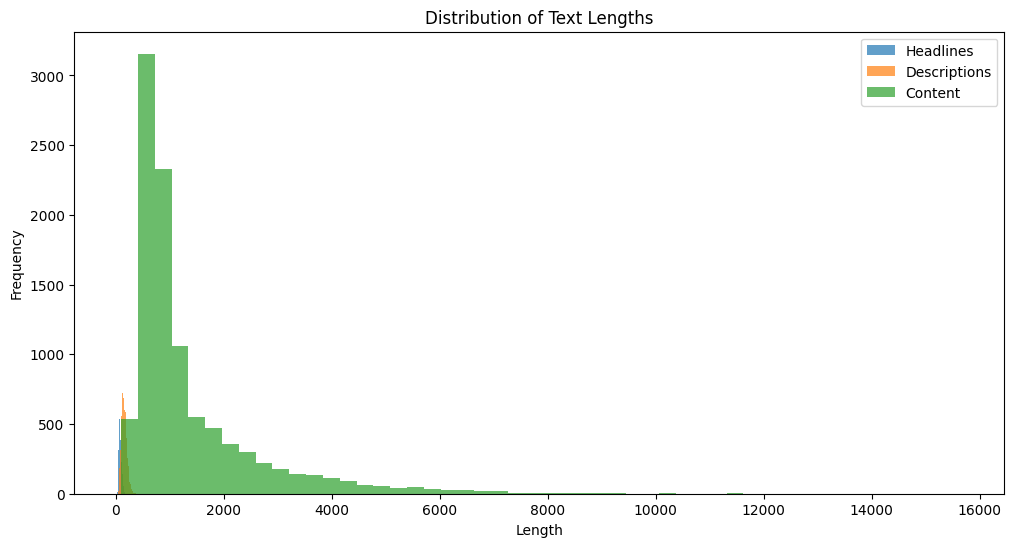

In [10]:
# Plot histograms for lengths
plt.figure(figsize=(12, 6))
plt.hist(combined_df['headline_length'], bins=50, alpha=0.7, label='Headlines')
plt.hist(combined_df['description_length'], bins=50, alpha=0.7, label='Descriptions')
plt.hist(combined_df['content_length'], bins=50, alpha=0.7, label='Content')
plt.legend(loc='upper right')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

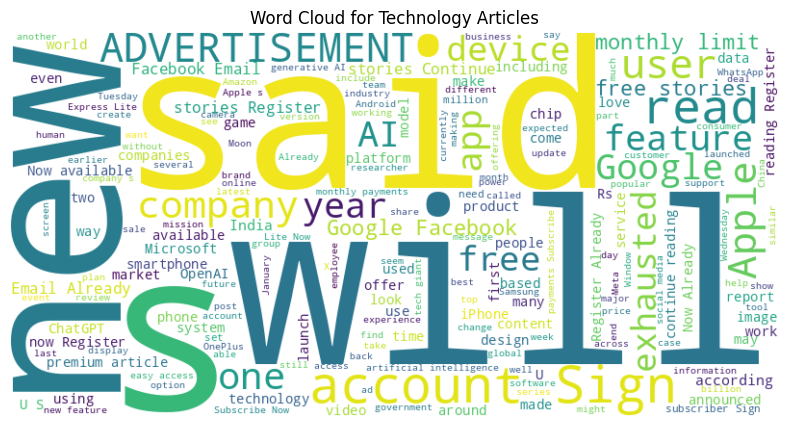

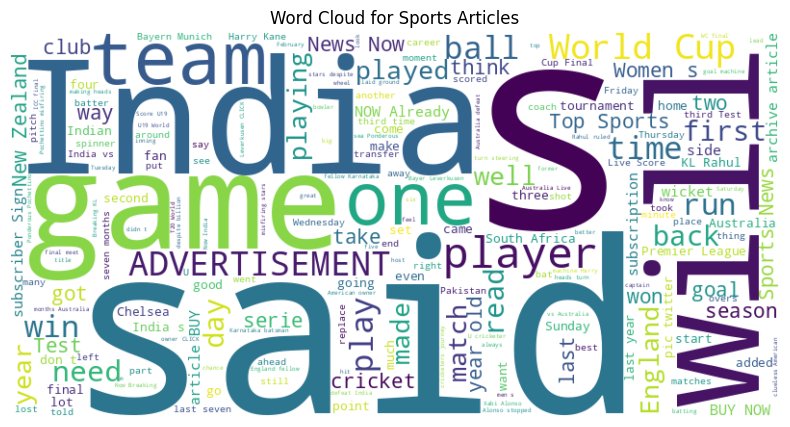

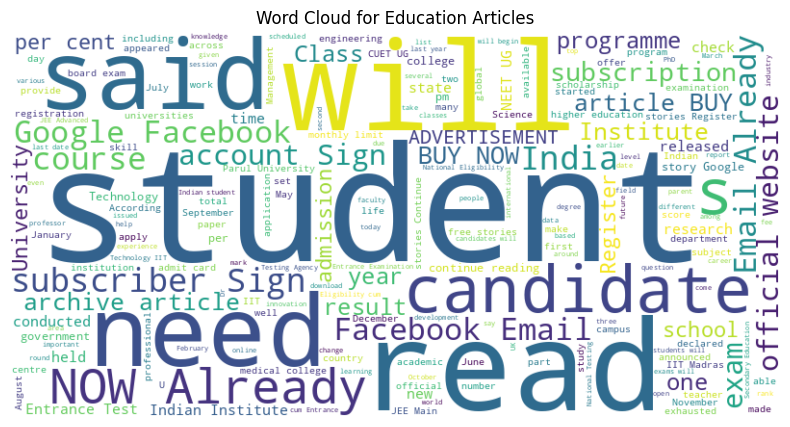

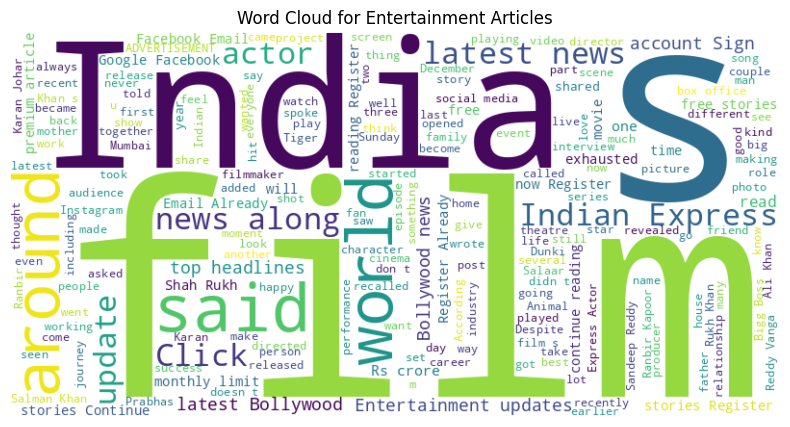

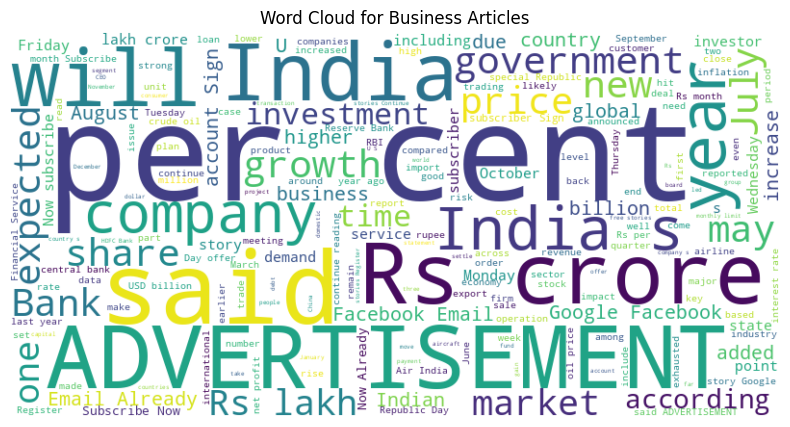

In [11]:
# Generate word clouds for each category
for category in combined_df['category'].unique():
    text = ' '.join(combined_df[combined_df['category'] == category]['content'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category.capitalize()} Articles')
    plt.axis('off')
    plt.show()

In [12]:
# Most common words in each category
for category in combined_df['category'].unique():
    text = ' '.join(combined_df[combined_df['category'] == category]['content'].values)
    words = text.split()
    common_words = Counter(words).most_common(10)
    print(f'Most common words in {category.capitalize()} articles: {common_words}')

Most common words in Technology articles: [('the', 18425), ('to', 11336), ('and', 8494), ('a', 8383), ('of', 8317), ('in', 6731), ('is', 4513), ('on', 4120), ('for', 3951), ('that', 3887)]
Most common words in Sports articles: [('the', 30839), ('to', 14209), ('in', 13734), ('a', 12295), ('and', 11519), ('of', 10749), ('for', 5479), ('on', 5291), ('was', 4282), ('is', 3934)]
Most common words in Education articles: [('the', 17278), ('of', 9510), ('and', 9180), ('to', 9031), ('in', 7981), ('a', 5640), ('for', 4835), ('The', 4224), ('is', 3062), ('on', 2693)]
Most common words in Entertainment articles: [('the', 18160), ('and', 13249), ('to', 8457), ('a', 8032), ('of', 7904), ('in', 7712), ('for', 5103), ('with', 5056), ('is', 4238), ('The', 4001)]
Most common words in Business articles: [('the', 27082), ('of', 15189), ('to', 14329), ('in', 13008), ('and', 12129), ('a', 9603), ('per', 5790), ('on', 5701), ('for', 4862), ('The', 4473)]


In [13]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


# Apply Preprocessing

In [14]:
import pandas as pd
import spacy
import re

# Load Spacy English model
nlp = spacy.load('en_core_web_sm')

# Load the combined dataset
combined_df = pd.read_csv('combined_news_data.csv')

# Function to clean text
def clean_text(text):
    # Remove unwanted characters
    text = re.sub(r'\W', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Function to preprocess text using Spacy
def preprocess_text(text):
    # Clean the text
    text = clean_text(text)
    # Process the text with Spacy
    doc = nlp(text)
    # Tokenize, remove stop words and punctuations, and lemmatize
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(words)

# Apply preprocessing to the text columns
combined_df['cleaned_headlines'] = combined_df['headlines'].apply(preprocess_text)
combined_df['cleaned_description'] = combined_df['description'].apply(preprocess_text)
combined_df['cleaned_content'] = combined_df['content'].apply(preprocess_text)

# Save the preprocessed dataset
#combined_df.to_csv('preprocessed_news_data.csv', index=False)

# Display the first few rows of the preprocessed dataframe
print(combined_df.head())


                                           headlines  \
0  Unlocking the science of E Ink displays: Why w...   
1  Reddit is free education: 9 subreddits that ca...   
2  Nintendo Switching things up? Leaks suggest la...   
3  Epic’s Fortnite and new browser engines show c...   
4  Hubble finds water vapour on small exoplanet i...   

                                         description  \
0  That e-reader screen isn't magic - it's E Ink!...   
1  These subreddits bring the best of the Interne...   
2  Rumour has it the upcoming Nintendo Switch 2 w...   
3  The EU's antitrust regulations are forcing App...   
4  Scientists have used the Hubble Space Telescop...   

                                             content  \
0  With their crisp, paper-like screens, e-reader...   
1  Education is the key to success, it not only l...   
2  Rumours are heating up that Nintendo may unvei...   
3  Apple is continuing to open up iOS to comply w...   
4  Astronomers used the Hubble Space Telescope

In [15]:
combined_df

,headlines,description,content,url,category,cleaned_headlines,cleaned_description,cleaned_content
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology,unlock science ink display believe catch,reader screen isn magic e ink break science pa...,crisp paper like screen reader like kindle ple...
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology,reddit free education 9 subreddit good teacher,subreddit bring good internet infographic educ...,education key success lead rewarding career in...
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology,nintendo switch thing leak suggest large 8 scr...,rumour upcoming nintendo switch 2 equip sizabl...,rumour heat nintendo unveil successor popular ...
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology,epic fortnite new browser engine crack apple w...,eu antitrust regulation force apple open io co...,apple continue open io comply new regulation e...
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology,hubble find water vapour small exoplanet landm...,scientist hubble space telescope discover pres...,astronomer hubble space telescope find evidenc...
...,...,...,...,...,...,...,...,...
9995,"Two official teams from India, EU to discuss c...",India raised these issues in the Trade and Tec...,India and the European Union have constituted ...,https://indianexpress.com/article/business/two...,business,official team india eu discuss carbon tax issue,india raise issue trade technology council ttc...,india european union constitute team discuss i...
9996,"Adani family sells $1 billion stake to GQG, ot...",The group's flagship Adani Enterprises Ltd saw...,US-based boutique investment firm GQG Partners...,https://indianexpress.com/article/business/com...,business,adani family sell 1 billion stake gqg investor,group flagship adani enterprises ltd see 18 mi...,base boutique investment firm gqg partner inve...
9997,Housing sales up 8% in April-June period acros...,Housing sales rose 8 per cent annually during ...,Housing sales rose 8 per cent annually during ...,https://indianexpress.com/article/business/hou...,business,housing sale 8 april june period 8 city report,housing sale rise 8 cent annually april june p...,housing sale rise 8 cent annually april june p...
9998,Spike in tomato prices temporary; rates will c...,The maximum price of Rs 122 per kg has been re...,The spurt in prices of tomato is a temporary s...,https://indianexpress.com/article/business/eco...,business,spike tomato price temporary rate cool soon go...,maximum price rs 122 kg report gorakhpur uttar...,spurt price tomato temporary seasonal phenomen...


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Combine the cleaned text columns into a single text column
combined_df['combined_text'] = combined_df['cleaned_headlines'] + ' ' + combined_df['cleaned_description'] + ' ' + combined_df['cleaned_content']

# Define the target variable (replace 'category' with your actual target column)
target = combined_df['category']

# Apply TF-IDF on the combined text column
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your requirements
X = tfidf_vectorizer.fit_transform(combined_df['combined_text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train a logistic regression classifier (you can use any classifier of your choice)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.987
Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.98      0.97       387
    education       0.99      0.99      0.99       395
entertainment       1.00      1.00      1.00       415
       sports       1.00      0.99      0.99       393
   technology       0.98      0.97      0.98       410

     accuracy                           0.99      2000
    macro avg       0.99      0.99      0.99      2000
 weighted avg       0.99      0.99      0.99      2000



In [21]:
combined_df

,headlines,description,content,url,category
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology
...,...,...,...,...,...
9995,"Two official teams from India, EU to discuss c...",India raised these issues in the Trade and Tec...,India and the European Union have constituted ...,https://indianexpress.com/article/business/two...,business
9996,"Adani family sells $1 billion stake to GQG, ot...",The group's flagship Adani Enterprises Ltd saw...,US-based boutique investment firm GQG Partners...,https://indianexpress.com/article/business/com...,business
9997,Housing sales up 8% in April-June period acros...,Housing sales rose 8 per cent annually during ...,Housing sales rose 8 per cent annually during ...,https://indianexpress.com/article/business/hou...,business
9998,Spike in tomato prices temporary; rates will c...,The maximum price of Rs 122 per kg has been re...,The spurt in prices of tomato is a temporary s...,https://indianexpress.com/article/business/eco...,business


# Apply Machine Learning Classifiers on combined_text (after Applying TFIDF for tokenization) on different train test ratios

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Combine the cleaned text columns into a single text column
combined_df['combined_text'] = combined_df['cleaned_headlines'] + ' ' + combined_df['cleaned_description'] + ' ' + combined_df['cleaned_content']

# Define the target variable (replace 'category' with your actual target column)
target = combined_df['category']

# Apply TF-IDF on the combined text column
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X = tfidf_vectorizer.fit_transform(combined_df['combined_text'])

# Define train-test split ratios
split_ratios = [0.4, 0.3, 0.2, 0.1]

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Loop through each train-test split ratio and classifier
for ratio in split_ratios:
    print(f'\nTrain-Test Split Ratio: {int((1-ratio)*100)}-{int(ratio*100)}\n{"-"*50}')
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=ratio, random_state=42)

    for name, clf in classifiers.items():
        # Train the classifier
        if name == 'Gaussian Naive Bayes':
            clf.fit(X_train.toarray(), y_train)  # GaussianNB requires dense matrix
            y_pred = clf.predict(X_test.toarray())
        else:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
        
        # Calculate metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        
        # Print metrics
        print(f'{name}:\n{"-"*50}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(f'Accuracy: {accuracy:.4f}\n')



Train-Test Split Ratio: 60-40
--------------------------------------------------
Logistic Regression:
--------------------------------------------------
Precision: 0.9833
Recall: 0.9832
F1 Score: 0.9833
Accuracy: 0.9832

Decision Tree:
--------------------------------------------------
Precision: 0.8915
Recall: 0.8910
F1 Score: 0.8911
Accuracy: 0.8910

Random Forest:
--------------------------------------------------
Precision: 0.9730
Recall: 0.9728
F1 Score: 0.9728
Accuracy: 0.9728

SVM:
--------------------------------------------------
Precision: 0.9856
Recall: 0.9855
F1 Score: 0.9855
Accuracy: 0.9855

Gaussian Naive Bayes:
--------------------------------------------------
Precision: 0.9293
Recall: 0.9280
F1 Score: 0.9279
Accuracy: 0.9280

K-Nearest Neighbors:
--------------------------------------------------
Precision: 0.9663
Recall: 0.9663
F1 Score: 0.9662
Accuracy: 0.9663


Train-Test Split Ratio: 70-30
--------------------------------------------------
Logistic Regression:
--

# Accuracy Graph of All ML classifiers on different train test ratios

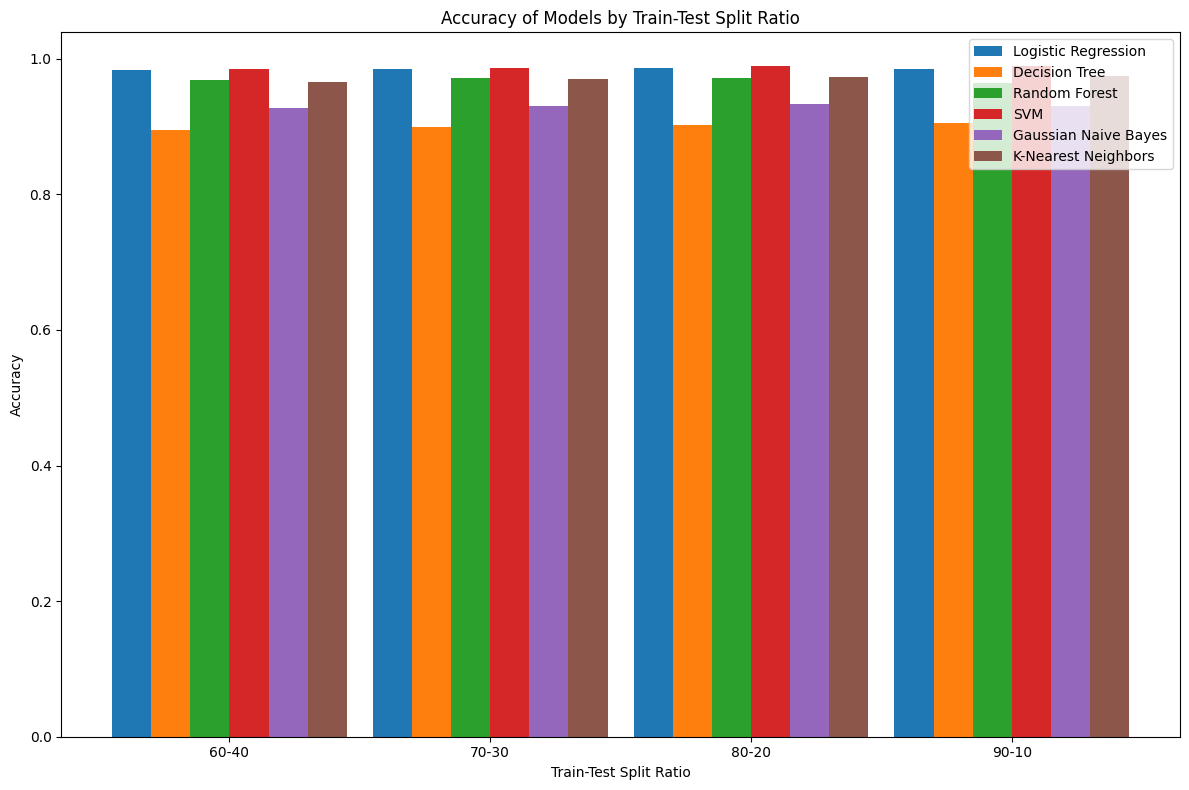

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the target variable (replace 'category' with your actual target column)
target = combined_df['category']

# Apply TF-IDF on the combined text column
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X = tfidf_vectorizer.fit_transform(combined_df['combined_text'])

# Define train-test split ratios
split_ratios = [0.4, 0.3, 0.2, 0.1]

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracies
accuracies = {clf: [] for clf in classifiers.keys()}

# Loop through each train-test split ratio and classifier
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=ratio, random_state=42)

    for name, clf in classifiers.items():
        # Train the classifier
        if name == 'Gaussian Naive Bayes':
            clf.fit(X_train.toarray(), y_train)  # GaussianNB requires dense matrix
            y_pred = clf.predict(X_test.toarray())
        else:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store accuracy
        accuracies[name].append(accuracy)

# Plot accuracies
split_labels = [f'{int((1-ratio)*100)}-{int(ratio*100)}' for ratio in split_ratios]
x = np.arange(len(split_labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
for i, (name, acc) in enumerate(accuracies.items()):
    ax.bar(x + i*width, acc, width, label=name)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Train-Test Split Ratio')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models by Train-Test Split Ratio')
ax.set_xticks(x + width * (len(classifiers) - 1) / 2)
ax.set_xticklabels(split_labels)
ax.legend()

fig.tight_layout()
plt.show()
